# Install prophet

In [1]:
!conda install -c conda-forge prophet -y

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/octamarina/miniconda3/envs/prophet

  added / updated specs:
    - prophet


The following NEW packages will be INSTALLED:

  brotli             conda-forge/osx-arm64::brotli-1.1.0-hd74edd7_2 
  brotli-bin         conda-forge/osx-arm64::brotli-bin-1.1.0-hd74edd7_2 
  cctools_osx-arm64  conda-forge/osx-arm64::cctools_osx-arm64-949.0.1-h92b3a8a_22 
  clang              conda-forge/osx-arm64::clang-14.0.6-hce30654_0 
  clang-14           conda-forge/osx-arm64::clang-14-14.0.6-default_h81a5282_0 
  clang_osx-arm64    conda-forge/osx-arm64::clang_osx-arm64-14.0.6-h15773ab_6 
  clangxx            conda-forge/osx-arm64::clangxx-14.0.6-default_hb7ecf47_0 
  clangxx_osx-arm64  conda-forge/osx-arm64::clangxx_osx-arm64-14.0.6-he29aa18_6 
  cmdstan            conda-forge/osx-arm64::cmdstan-2.31.0-hd06e7c4_0 
  cmdstanpy          conda-forge/noarch::cmdstanpy-1.2.4-

In [63]:
import warnings
warnings.simplefilter('ignore')

# Load Data and filter data

In [64]:
import pandas as pd
df = pd.read_csv('dataset.csv')

In [65]:
df.head()

,Date,Store,Product,Value
0,20180101,LOS_ANGELES,TESLA_MODEL_X,2926.000
1,20180102,LOS_ANGELES,TESLA_MODEL_X,2687.531
2,20180103,LOS_ANGELES,TESLA_MODEL_X,2793.000
3,20180104,LOS_ANGELES,TESLA_MODEL_X,2394.000
4,20180105,LOS_ANGELES,TESLA_MODEL_X,2660.000


In [66]:
df.dtypes

Date         int64
Store       object
Product     object
Value      float64
dtype: object

In [67]:
# get the unique products
df.Store.unique()

array(['LOS_ANGELES', 'SAN_FRANCISCO'], dtype=object)

In [68]:
df.Product.unique()

array(['TESLA_MODEL_X', 'TESLA_MODEL_S'], dtype=object)

In [69]:
# filter to have just los angeles and tesla model x
df = df[(df['Store'] == 'LOS_ANGELES')&(df['Product']=='TESLA_MODEL_X')]

So we have to create:
   - A Los Angeles model for the model X
   - A Los Angeles model for the model S
   - A San Francisco model for the model X
   - A San Francisco model fro the model S

# Preprocess and Create Partitions
We have to split it based on a date

In [70]:
df.Date.dtypes

dtype('int64')

In [71]:
df['ds'] = pd.to_datetime(df.Date, format='%Y%m%d')

In [72]:
df.head()

,Date,Store,Product,Value,ds
0,20180101,LOS_ANGELES,TESLA_MODEL_X,2926.000,2018-01-01
1,20180102,LOS_ANGELES,TESLA_MODEL_X,2687.531,2018-01-02
2,20180103,LOS_ANGELES,TESLA_MODEL_X,2793.000,2018-01-03
3,20180104,LOS_ANGELES,TESLA_MODEL_X,2394.000,2018-01-04
4,20180105,LOS_ANGELES,TESLA_MODEL_X,2660.000,2018-01-05


In [73]:
df['day'] = df['ds'].dt.day
df['month'] = df['ds'].dt.month
df['year'] = df['ds'].dt.year

In [74]:
df.head(25)

,Date,Store,Product,Value,ds,day,month,year
0,20180101,LOS_ANGELES,TESLA_MODEL_X,2926.0000,2018-01-01,1,1,2018
1,20180102,LOS_ANGELES,TESLA_MODEL_X,2687.5310,2018-01-02,2,1,2018
2,20180103,LOS_ANGELES,TESLA_MODEL_X,2793.0000,2018-01-03,3,1,2018
3,20180104,LOS_ANGELES,TESLA_MODEL_X,2394.0000,2018-01-04,4,1,2018
4,20180105,LOS_ANGELES,TESLA_MODEL_X,2660.0000,2018-01-05,5,1,2018
5,20180106,LOS_ANGELES,TESLA_MODEL_X,2527.0000,2018-01-06,6,1,2018
6,20180107,LOS_ANGELES,TESLA_MODEL_X,2527.0000,2018-01-07,7,1,2018
7,20180108,LOS_ANGELES,TESLA_MODEL_X,2793.0000,2018-01-08,8,1,2018
8,20180109,LOS_ANGELES,TESLA_MODEL_X,2793.0000,2018-01-09,9,1,2018
9,20180110,LOS_ANGELES,TESLA_MODEL_X,2793.0000,2018-01-10,10,1,2018


In [75]:
df.drop(['Date','Store','Product','day','month','year'], axis=1, inplace=True)

In [76]:
df.columns = ['y','ds']

In [77]:
df

,y,ds
0,2926.000000,2018-01-01
1,2687.531000,2018-01-02
2,2793.000000,2018-01-03
3,2394.000000,2018-01-04
4,2660.000000,2018-01-05
...,...,...
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15


# Visualize the data

In [78]:
import seaborn as sns
from matplotlib import pyplot as plt

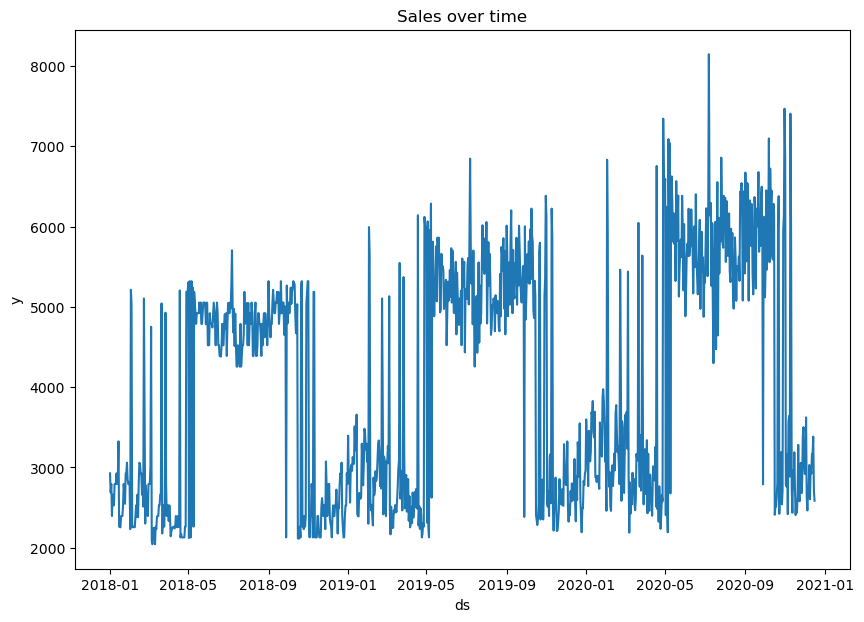

In [79]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x=df['ds'], y=df['y'])
plt.title("Sales over time")
plt.show()

# Create train and test splits

In [80]:
df['ds'].min()

Timestamp('2018-01-01 00:00:00')

In [81]:
df['ds'].max()

Timestamp('2020-12-16 00:00:00')

In [82]:
train = df[df['ds'] < '2020-06-30 00:00']
test = df[df['ds'] > '2020-06-30 00:00']

In [83]:
train.shape

(910, 2)

In [84]:
test.shape

(169, 2)

# Create a prophet model

In [92]:
!pip install prophet

In [93]:
from prophet import Prophet
print("Prophet este instalat!")

ModuleNotFoundError: No module named 'prophet'

In [90]:
m = Prophet()
model = m.fit(train)

NameError: name 'Prophet' is not defined

In [97]:
!which python
!conda init zsh
!conda activate Tesla-forecasting
!pip uninstall prophet -y
!conda install -c conda-forge prophet -y
!pip show prophet

/Users/octamarina/miniconda3/envs/Tesla-forecasting/bin/python
no change     /Users/octamarina/miniconda3/condabin/conda
no change     /Users/octamarina/miniconda3/bin/conda
no change     /Users/octamarina/miniconda3/bin/conda-env
no change     /Users/octamarina/miniconda3/bin/activate
no change     /Users/octamarina/miniconda3/bin/deactivate
no change     /Users/octamarina/miniconda3/etc/profile.d/conda.sh
no change     /Users/octamarina/miniconda3/etc/fish/conf.d/conda.fish
no change     /Users/octamarina/miniconda3/shell/condabin/Conda.psm1
no change     /Users/octamarina/miniconda3/shell/condabin/conda-hook.ps1
no change     /Users/octamarina/miniconda3/lib/python3.11/site-packages/xontrib/conda.xsh
no change     /Users/octamarina/miniconda3/etc/profile.d/conda.csh
no change     /Users/octamarina/.zshrc
No action taken.

CondaError: Run 'conda init' before 'conda activate'

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages 

In [4]:
from prophet import Prophet